In [1]:
__author__ = "Yasaman Emami"
__email__ = ['emami.yasamann@gmail.com','yasaman.emami@sjsu.edu']

# Question 2

In [2]:
# Import libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.datasets import mnist
%matplotlib inline
import pandas as pd
from sklearn.metrics import confusion_matrix
from tensorflow.keras import initializers
import sys
import numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import random


2022-09-11 22:49:44.556715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Split data to train and test

In [3]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Filter to keep 2 classes

In [4]:
# Filter data to keep two classes out of 10
train_binary_classes_idx = np.where((y_train == 0) | (y_train == 1))
test_binary_classes_idx = np.where((y_test == 0) | (y_test == 1))

In [5]:
y_train = y_train[train_binary_classes_idx]
x_train = x_train[train_binary_classes_idx]
y_test = y_test[test_binary_classes_idx]
x_test = x_test[test_binary_classes_idx]

In [6]:
np.unique(y_train)

array([0, 1], dtype=uint8)

1


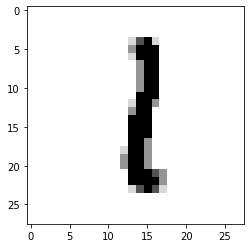

In [7]:
# Random sample from train dataset
image_index = 130
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [8]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [9]:
y_test

array([1, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [10]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [11]:
# Number of train, test data
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (12665, 28, 28, 1)
12665 train samples
2115 test samples


In [12]:
num_classes = 2

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train ,num_classes=2, dtype ="int32")
y_test = keras.utils.to_categorical(y_test ,num_classes=2, dtype ="int32")

## part(a). Create NN with early stopping criteria based on validation loss

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 14)                10990     
                                                                 
 dense_1 (Dense)             (None, 2)                 30        
                                                                 
Total params: 11,020
Trainable params: 11,020
Non-trainable params: 0
_________________________________________________________________


2022-09-11 22:49:53.661177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


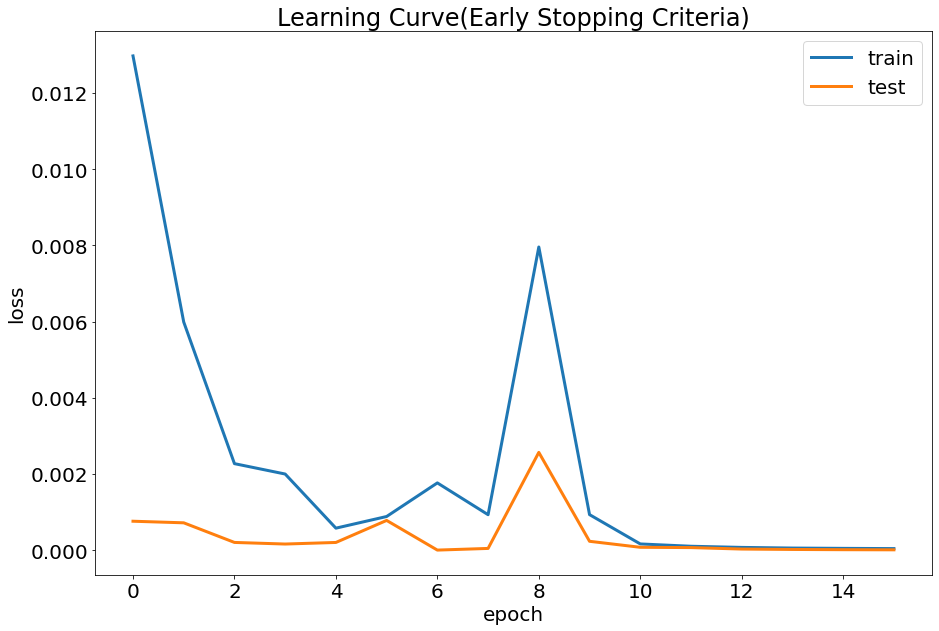

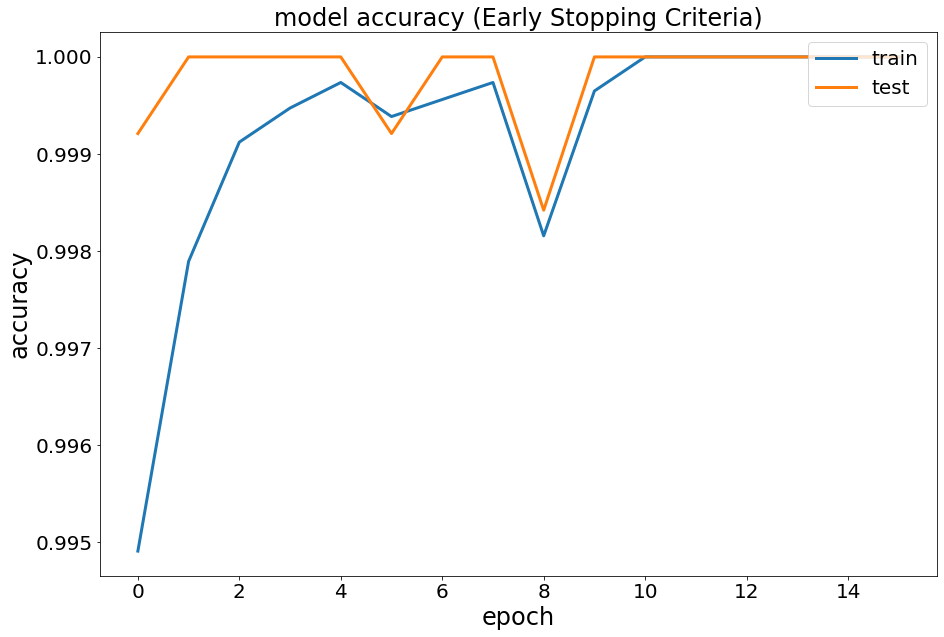

Stopping epoch out of 100 epochs:  16


Test loss: 0.0021407464519143105
Test accuracy: 0.9995272159576416
67/67 [==============================] - 0s 869us/step
confusion matrix 
 [[ 979    1]
 [   0 1135]]

Samples of Early Stopping NN




probabilities:  [1.0571326e-04 1.0000000e+00]
predicted number = >  1


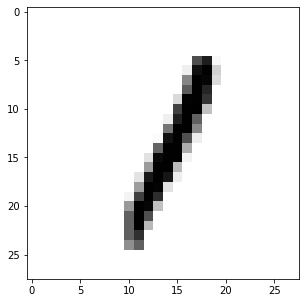



probabilities:  [0.999744   0.03297425]
predicted number = >  0


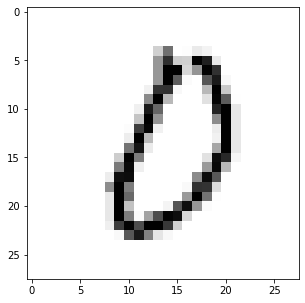



probabilities:  [1.0000000e+00 7.3363315e-13]
predicted number = >  0


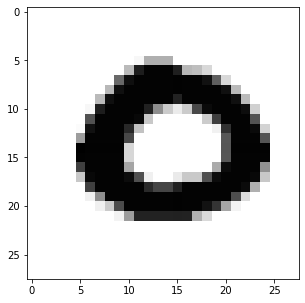



probabilities:  [1.0000000e+00 4.0355946e-10]
predicted number = >  0


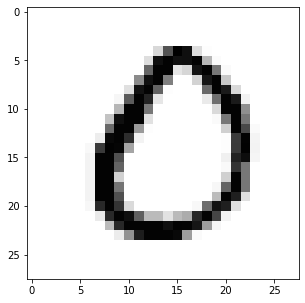



probabilities:  [1.1614031e-05 1.0000000e+00]
predicted number = >  1


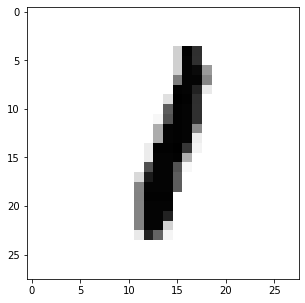

In [13]:
# create fully connected NN

model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))

# Hidden Layer with 14 nodes and 'relu' as activation function
# Output layer with 2 nodes and 'softmax' as activation function
layer_a = layers.Dense(14, activation='relu')
model.add(layer_a)

# print(len(layer_a.get_weights()[0]))
layer_b = layers.Dense(2, activation='sigmoid')
model.add(layer_b)
model.summary()
#weights = model.get_weights()
model.compile(loss='categorical_crossentropy', 
          optimizer= keras.optimizers.Adam(learning_rate= 0.01),
          metrics=['acc'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=9)
history = model.fit(x_train, y_train, epochs=100, batch_size = 32, validation_split = 0.1, callbacks = [callback], verbose = 0)
# for layer in model.layers: print(layer.get_config(), layer.get_weights())

# summarize history for loss
plt.rcParams["figure.figsize"] = (15,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(history.history['loss'], linewidth=3)
plt.plot(history.history['val_loss'], linewidth=3)
plt.title('Learning Curve(Early Stopping Criteria)', fontsize=24)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['train', 'test'], loc='upper right', fontsize=20)

plt.show()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(history.history['acc'], linewidth=3)
plt.plot(history.history['val_acc'], linewidth=3)
plt.title('model accuracy (Early Stopping Criteria)', fontsize=24)
plt.ylabel('accuracy', fontsize=24)
plt.xlabel('epoch', fontsize=24)
plt.legend(['train', 'test'], loc='upper right', fontsize=20)
plt.show()

print("Stopping epoch out of 100 epochs: ",len(history.history['loss']))

score = model.evaluate(x_test, y_test, verbose=0)
print("\n\nTest loss:", score[0])
print("Test accuracy:", score[1])

#predict test data
predict = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), predict.argmax(axis=1))
print("confusion matrix \n", matrix)
print("\nSamples of Early Stopping NN\n\n")

# generate 5 random samples
rand_idx = []
for i in range(5):
    rand_idx.append(random.randint(0, 2114))
    
for i in rand_idx:
    image_index = i
    print("\n\nprobabilities: ", predict[image_index])
    if predict[image_index][0]>0.5:
        res = 0
    else:
        res = 1
    print("predicted number = > ", res)
    plt.rcParams["figure.figsize"] = (5,5)
    plt.imshow(x_test[image_index], cmap='Greys')
    plt.show()

## part(b).Build 3 NN with 3 different weight initializers

In [14]:
# Define three different random intialializers
seed = 123
kernel_initializer_1 = keras.initializers.RandomNormal(mean=0., stddev=1., seed=seed)
kernel_initializer_2 = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=seed)
kernel_initializer_3 = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=seed)

In [15]:
# Build Neural Network
# @input: random initializers, initializer name
# @output: learning curve plot,
#          stop epoch number out of 100
#          test loss & accuracy
#          confusion matrix
#.         samples of model from test dataset

def NNBuild(initializer, init_name):
    
    print("\n\n=========== " + init_name + " ============\n\n")
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    layer_a = layers.Dense(14, activation='relu', kernel_initializer=initializer)
    
    model.add(layer_a)
    # print(len(layer_a.get_weights()[0]))
    layer_b = layers.Dense(2, activation='sigmoid',kernel_initializer=initializer)
    model.add(layer_b)
    model.summary()
    weights = model.get_weights()
    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=9)
    model.compile(loss='categorical_crossentropy', 
              optimizer= keras.optimizers.Adam(learning_rate= 0.01),
              metrics=['acc'])
    
    history = model.fit(x_train, y_train, epochs=100, batch_size = 128, callbacks = [callback], validation_split = 0.1, verbose = 0)
    # for layer in model.layers: print(layer.get_config(), layer.get_weights())
    # summarize history for loss
    ttl = 'Learning curve ' + init_name
    plt.rcParams["figure.figsize"] = (15,10)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.plot(history.history['loss'], linewidth=3)
    plt.plot(history.history['val_loss'], linewidth=3)
    plt.title(ttl, fontsize=24)
    plt.ylabel('loss', fontsize=20)
    plt.xlabel('epoch', fontsize=20)
    plt.legend(['train', 'test'], loc='upper right', fontsize=20)
    
    plt.show()
    
    ttl1 = 'Model Accuracy ' + init_name
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.plot(history.history['acc'], linewidth=3)
    plt.plot(history.history['val_acc'], linewidth=3)
    plt.title(ttl1, fontsize=24)
    plt.ylabel('accuracy', fontsize=24)
    plt.xlabel('epoch', fontsize=24)
    plt.legend(['train', 'test'], loc='upper right', fontsize=20)
    plt.show()
    
    print("stopping epoch: ",len(history.history['loss']))
    
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    
    #predict test data
    predict = model.predict(x_test)
    matrix = confusion_matrix(y_test.argmax(axis=1), predict.argmax(axis=1))
    print(init_name + " confusion matrix \n", matrix)
    print("\nSamples of " + init_name + "\n\n")
    for i in [10,15,18,32]:
        image_index = i
        print("\n\nprobabilities: ", predict[image_index])
        if predict[image_index][0]>0.5:
            res = 0
        else:
            res = 1
        print("predicted number = > ", res)
        plt.rcParams["figure.figsize"] = (5,5)
        plt.imshow(x_test[image_index], cmap='Greys')
        plt.show()



=========== RandomNormal initializer ============


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 14)                10990     
                                                                 
 dense_3 (Dense)             (None, 2)                 30        
                                                                 
Total params: 11,020
Trainable params: 11,020
Non-trainable params: 0
_________________________________________________________________


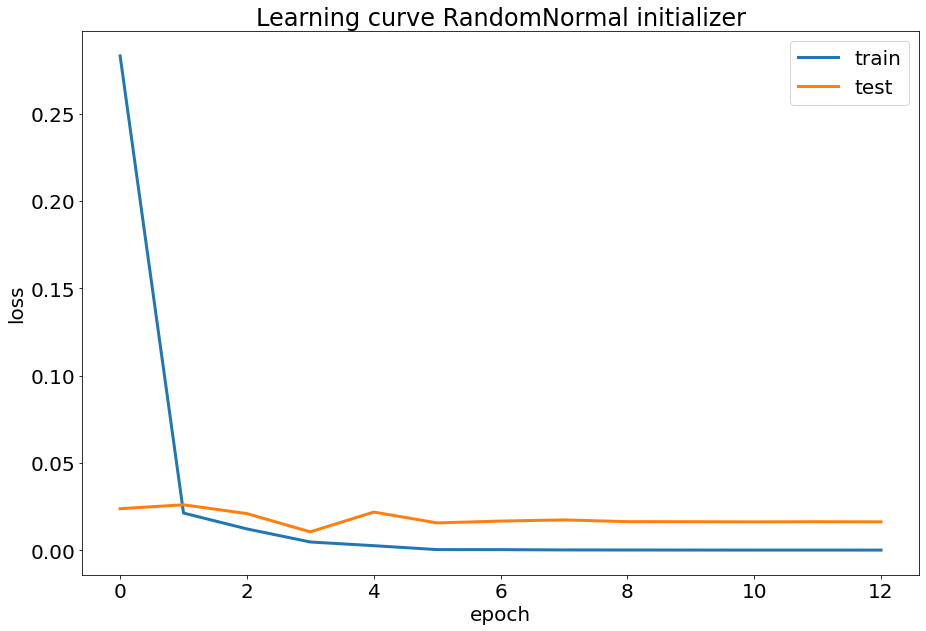

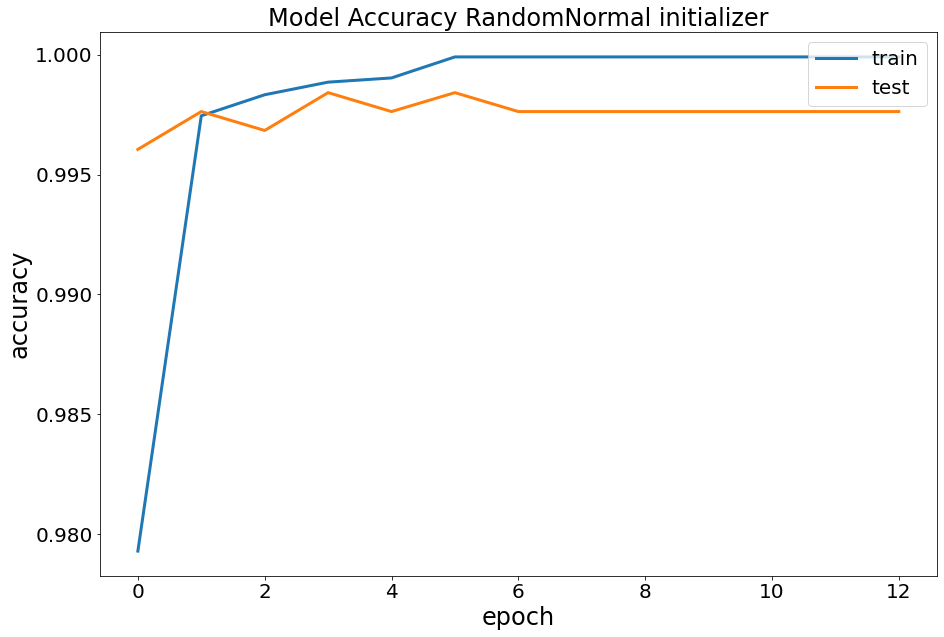

stopping epoch:  13
Test loss: 0.0071434518322348595
Test accuracy: 0.9990543723106384
67/67 [==============================] - 0s 892us/step
RandomNormal initializer confusion matrix 
 [[ 978    2]
 [   0 1135]]

Samples of RandomNormal initializer




probabilities:  [8.1132976e-14 9.9999875e-01]
predicted number = >  1


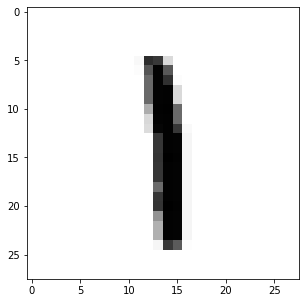



probabilities:  [0.7691063 1.       ]
predicted number = >  0


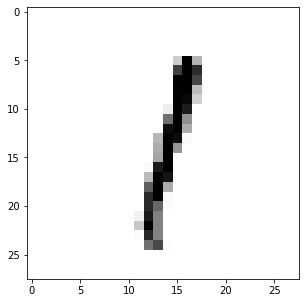



probabilities:  [2.9407612e-19 9.9982905e-01]
predicted number = >  1


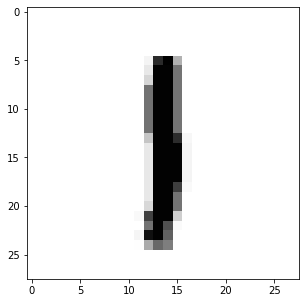



probabilities:  [1.000000e+00 7.332301e-04]
predicted number = >  0


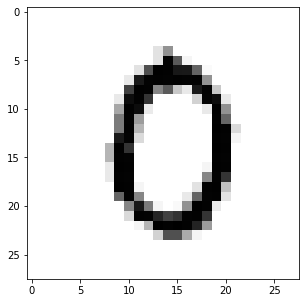



=========== TruncatedNormal initializer ============


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 14)                10990     
                                                                 
 dense_5 (Dense)             (None, 2)                 30        
                                                                 
Total params: 11,020
Trainable params: 11,020
Non-trainable params: 0
_________________________________________________________________


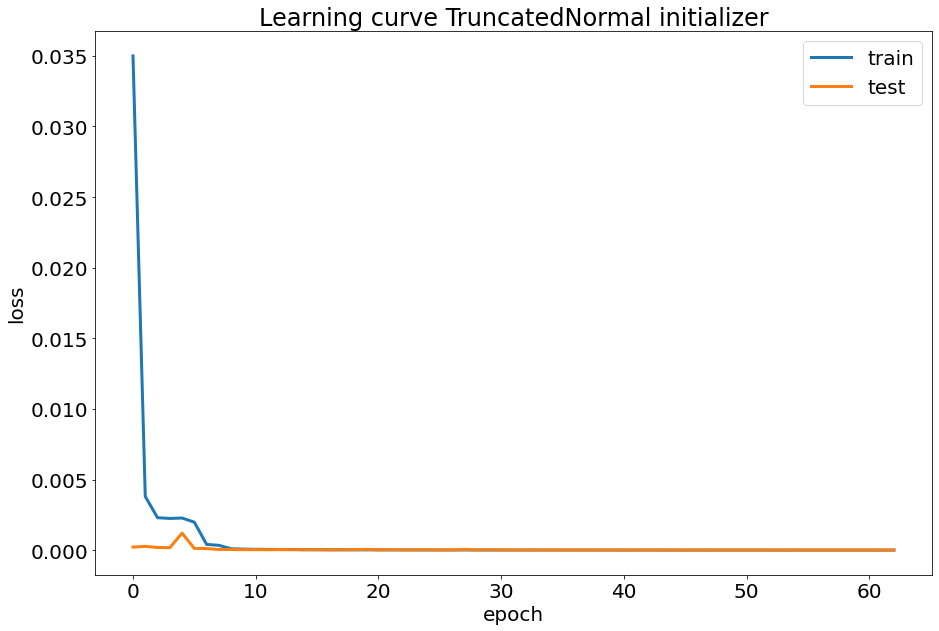

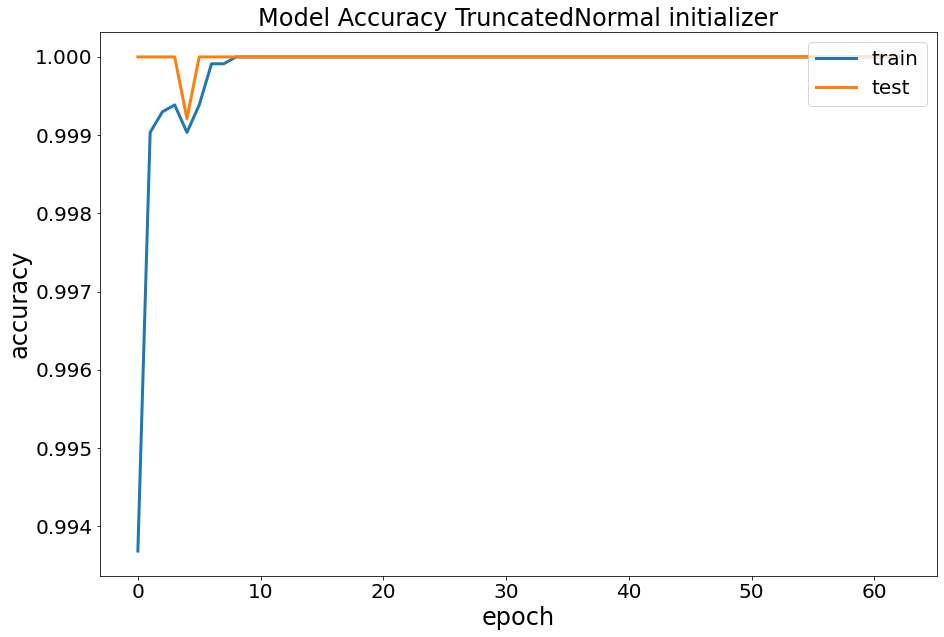

stopping epoch:  63
Test loss: 0.0017498747911304235
Test accuracy: 0.9995272159576416
67/67 [==============================] - 0s 918us/step
TruncatedNormal initializer confusion matrix 
 [[ 979    1]
 [   0 1135]]

Samples of TruncatedNormal initializer




probabilities:  [1.9011222e-06 9.9999952e-01]
predicted number = >  1


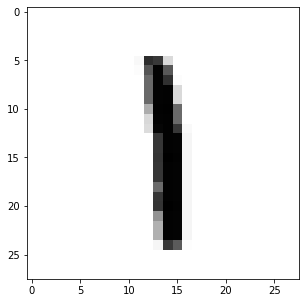



probabilities:  [4.0873673e-04 9.9984252e-01]
predicted number = >  1


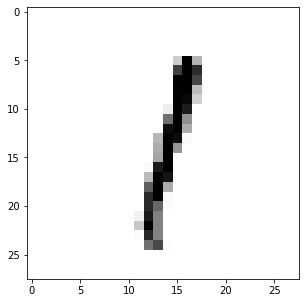



probabilities:  [1.9233507e-06 9.9999958e-01]
predicted number = >  1


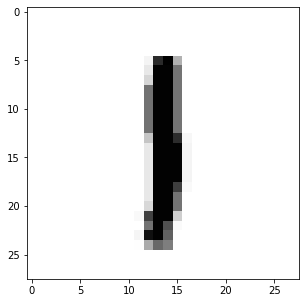



probabilities:  [9.9999827e-01 1.8564454e-06]
predicted number = >  0


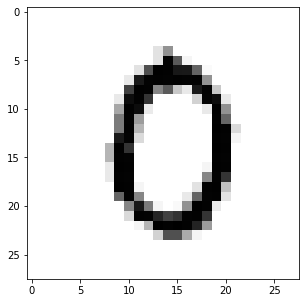



=========== RandomUniform initializer ============


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 14)                10990     
                                                                 
 dense_7 (Dense)             (None, 2)                 30        
                                                                 
Total params: 11,020
Trainable params: 11,020
Non-trainable params: 0
_________________________________________________________________


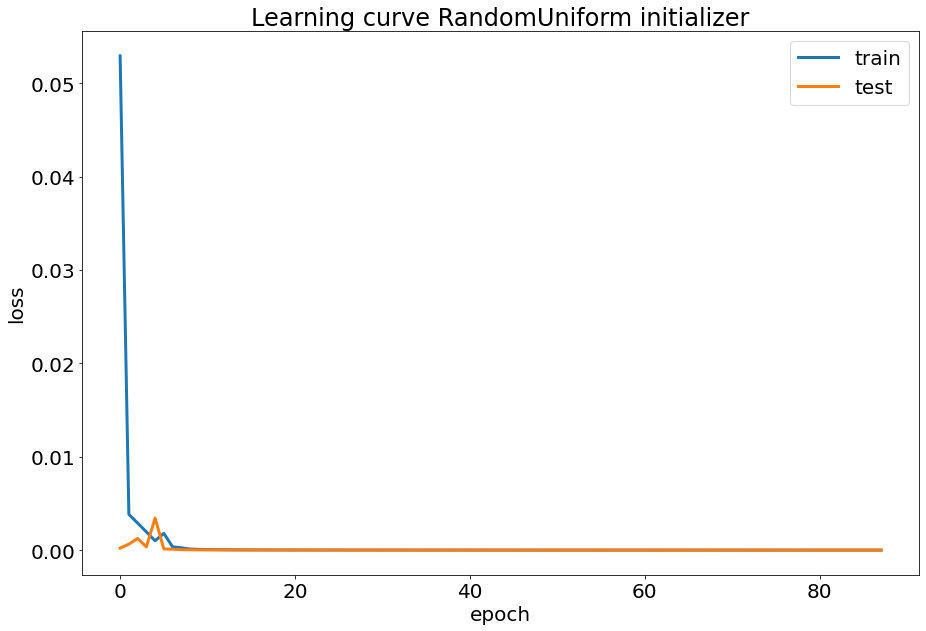

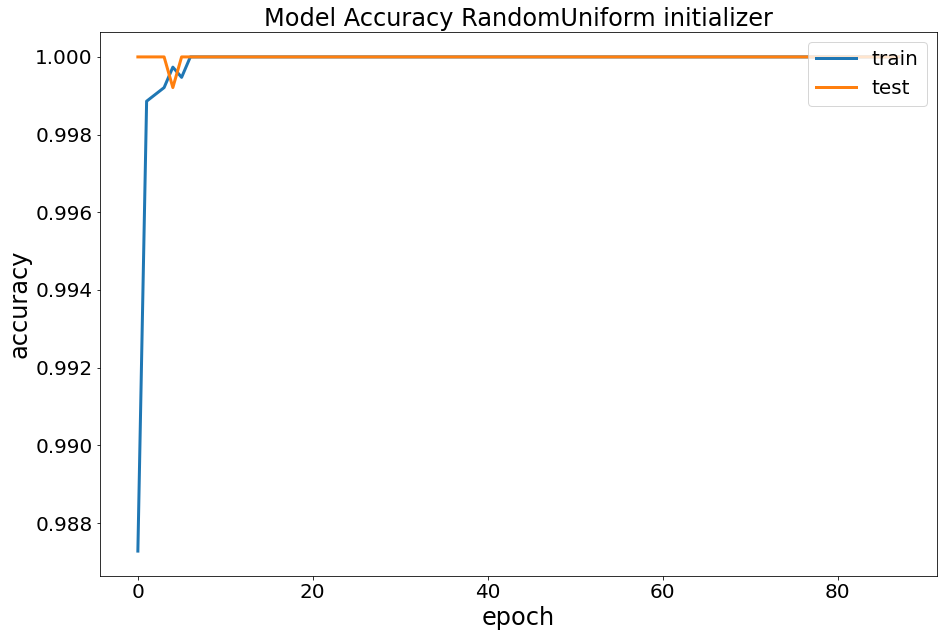

stopping epoch:  88
Test loss: 0.0003960185858886689
Test accuracy: 0.9995272159576416
67/67 [==============================] - 0s 892us/step
RandomUniform initializer confusion matrix 
 [[ 979    1]
 [   0 1135]]

Samples of RandomUniform initializer




probabilities:  [9.059761e-10 1.000000e+00]
predicted number = >  1


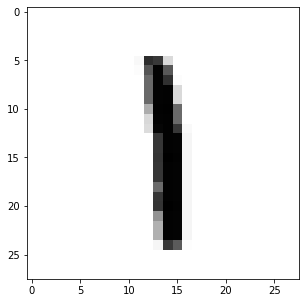



probabilities:  [4.0285366e-05 9.9996495e-01]
predicted number = >  1


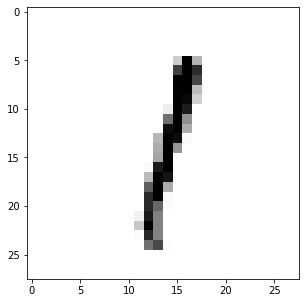



probabilities:  [5.776383e-09 1.000000e+00]
predicted number = >  1


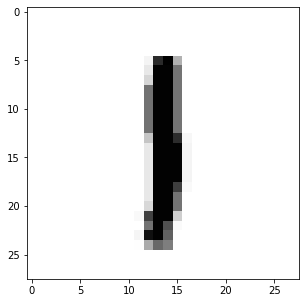



probabilities:  [9.99986410e-01 1.20121795e-05]
predicted number = >  0


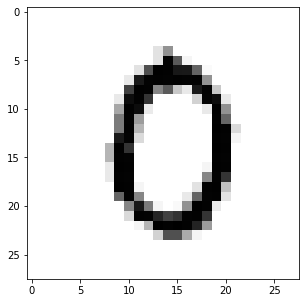

In [16]:
NNBuild(kernel_initializer_1, "RandomNormal initializer")
NNBuild(kernel_initializer_2, "TruncatedNormal initializer")
NNBuild(kernel_initializer_3, "RandomUniform initializer")

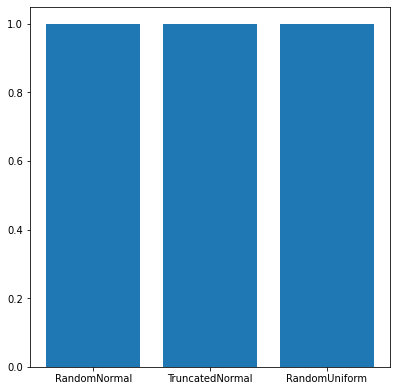

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model_names = ['RandomNormal', 'TruncatedNormal', 'RandomUniform']
accuracy = [0.9990,0.9995,0.9990]
ax.bar(model_names,accuracy)
plt.show()